In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

In [3]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
blues = cm.get_cmap("Blues",lut=15)
spec = cm.get_cmap("Purples",lut =15)
reds = cm.get_cmap("Reds",lut =15)
Orag = cm.get_cmap("YlOrBr",lut =15)
spri = cm.get_cmap("Wistia",lut =21)

c_blues = [blues(i) for i in range(15)]
c_spec = [spec(i) for i in range(15)]
c_rs = [reds(i) for i in range(15)]
c_os = [Orag(i) for i in range(15)]
c_spri = [spri(i) for i in range(21)]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 11})

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_79334/1826019236.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues = cm.get_cmap("Blues",lut=15)
/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_79334/1826019236.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spec = cm.get_cmap("Purples",lut =15)
/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_79334/1826019236.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reds = cm.get_cmap("Red

In [90]:
size = [3,5]

alp_arr = [0,0.01,0.05,0.1,0.2,1]
alp_index = 0


'''
alp = np.linspace(0,2,201)
alp_arr = []

for i in range(len(alp)):
    if i == 0 or i == 100 or i == 200:
        alp_arr.append(int(alp[i]))
    else:
        alp_arr.append(round(alp[i],2))
'''
        
gam = np.linspace(0,2,21)
gam_arr = []

gamm = [0 for i in range(21)]
for i in range(21):
    if i==0:
        gamm[i] = 0
    elif i != 20:
        gamm[i] = round(gamm[i-1] + 0.05,2)
    else:
        gamm[i] = int(gamm[i-1] + 0.05)
        
for i in range(len(gam)):
    if i==0:
        gam_arr.append(0)
    elif i==20 or i ==10:
        gam_arr.append(int(gam[i]))
    else:
        gam_arr.append(round(gam[i],2))

beta = [25,27.78]

#gam_arr
alp_arr

[0, 0.01, 0.05, 0.1, 0.2, 1]

In [ ]:
gam = np.linspace(0,2,201)
gam_arr = []
for i in range(len(gam)):
    if i==0 or i==100 or i==200:
        gam_arr.append(int(gam[i]))
    else:
        gam_arr.append(round(gam[i],2))

gam_arr

In [95]:
def read_matrix_from_file(filename,size):
    a = pd.read_csv(filename,header=None,delim_whitespace=True)
    b = []
    for i in range(len(a.columns)):
        b.append(a[i][len(a)-1])
    #with open(filename, 'r') as f:
        #data = f.read().split()
    return np.array([float(x) for x in b]).reshape(size, size)

def rread_matrix_from_file(filename,size):
    with open(filename, 'r') as f:
        data = f.read().split()
    return np.array([float(x) for x in data]).reshape(size, size)

def TOA_matrix_from_file(filename,size):
    dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
    data = []
    for i in range(1,10,1):
        data.append(dat[i][400])
    return np.array([float(x) for x in data]).reshape(size, size)

def calculate_expectation_value(density_matrix, operator_matrix):
    return np.trace(np.dot(density_matrix, operator_matrix))

NCA

In [ ]:
for k in range(len(beta)):    
    for i in range(len(alp_arr)):
        globals()['N_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=[]
        for j in range(len(gam_arr)):
            if beta[k] < 26:
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/NCA/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_3.txt'.format(gam_arr[j],alp_arr[i],beta[k]),3)
            elif beta[k] > 26:
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/NCA/size3/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_3.txt'.format(gam_arr[j],alp_arr[i],beta[k]),3)


            operator_matrix = rread_matrix_from_file('./COS/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_3.txt'.format(gam_arr[j],alp_arr[i]),size[0])
            expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

            globals()['N_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])].append(expectation_value)
        df = np.column_stack((gam_arr,globals()['N_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]))
        np.savetxt('./Expec/NCA/size3/N_expec_s3_a{}_b{}.txt'.format(alp_arr[i],beta[k]),df)

NCA SIZE DEP


In [ ]:
for k in range(len(beta)):    
    for i in range(len(alp_arr)):
        globals()['SN_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=[]
        for j in range(len(gam_arr)):
            if beta[k] < 26:
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240930_Revisedsize5/Con7_2/NCA/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_5.txt'.format(gam_arr[j],alp_arr[i],beta[k]),size[1])
            elif beta[k] > 26:    
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/NCA/size5/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_5.txt'.format(gam_arr[j],alp_arr[i],beta[k]),size[1])

            operator_matrix = rread_matrix_from_file('./COS/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_5.txt'.format(gam_arr[j],alp_arr[i]),size[1])
            expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

            globals()['SN_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])].append(expectation_value)
        df = np.column_stack((gam_arr,globals()['SN_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]))
        np.savetxt('./Expec/NCA/size5/N_expec_s5_a{}_b{}.txt'.format(alp_arr[i],beta[k]),df)

OCA

In [91]:
for k in range(len(beta)):    
    for i in range(len(alp_arr)):
        globals()['O_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=[]
        for j in range(len(gam_arr)):
            if beta[k] < 26 and j != 0:
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_3.txt'.format(gam_arr[j],alp_arr[i],beta[k]),3)
            if beta[k] < 26 and j == 0:    
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[j],alp_arr[i],beta[k]),3)
            elif beta[k] > 26:
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/OCA/size3/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[j],alp_arr[i],beta[k]),3)
           
            operator_matrix = rread_matrix_from_file('./COS/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_3.txt'.format(gam_arr[j],alp_arr[i]),size[0])
            expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

            globals()['O_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])].append(expectation_value)
        #df = np.column_stack((gam_arr,globals()['O_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]))
        #np.savetxt('./Expec/OCA/size3/O_expec_s3_a{}_b{}.txt'.format(alp_arr[i],beta[k]),df)

OCA size

In [ ]:
for k in range(len(beta)):    
    for i in range(len(alp_arr)):
        globals()['SO_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=[]
        for j in range(len(gam_arr)):
            if beta[k] < 26:
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240930_Revisedsize5/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_5.txt'.format(gam_arr[j],alp_arr[i],beta[k]),size[1])
            
            elif beta[k] > 26:
                #density_matrix = read_matrix_from_file('./testdata/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_5.txt'.format(gam_arr[j],alp_arr[i],beta[k]),size[1])
                density_matrix = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/OCA/size5/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_5.txt'.format(gam_arr[j],alp_arr[i],beta[k]),size[1])
           
            operator_matrix = rread_matrix_from_file('./COS/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_5.txt'.format(gam_arr[j],alp_arr[i]),size[1])
            expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

            globals()['SO_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])].append(expectation_value)
        df = np.column_stack((gam_arr,globals()['SO_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]))
        np.savetxt('./Expec/OCA/size5/O_expec_s5_a{}_b{}.txt'.format(alp_arr[i],beta[k]),df)

TOA

In [97]:
for k in range(len(beta)):
    for i in range(len(alp_arr)):
        globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=[]
        for j in range(len(gamm)):
            if beta[k] < 26:
                density_matrix = TOA_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241001_Con7_1TOAdat/{}/data/Gt_g{}_a{}.dat'.format(beta[k],gamm[j],alp_arr[i]),3)
            elif beta[k] > 26:
                density_matrix = TOA_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241011_TOACon6/b{}/data/Gt_g{}_a{}.dat'.format(beta[k],gamm[j],alp_arr[i]),3)
            operator_matrix = rread_matrix_from_file('./COS/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_3.txt'.format(gamm[j],alp_arr[i]),size[0])

            expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

            globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])].append(expectation_value)
            df = np.column_stack((gamm,globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]))
            np.savetxt('./Expec/TOA/T_expec_s3_a{}_b{}.txt'.format(alp_arr[i],beta[k]),df)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 21 and the array at index 1 has size 1

In [ ]:
fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 1.5

plt.xlabel(r'$\gamma$')

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')



plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 11})

plt.title(r"Orderparam result $\alpha$ = " + str(alp_arr[alp_index]))# in $\alpha$ = " + str(alp_arr[alp_index]))

plt.xlabel(r'$\gamma$')
plt.ylabel(r'[Tr$\mathcal{G}(\tau=\beta)\cos{\phi}$]',font="Times New Roman")

'''
a = 0

for j in range(len(beta)):
    for i in range(len(alp_arr)):
        if i%2 == 0:
            plt.plot(gamm[:-1],globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="TOA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ =' + str(alp_arr[i]),color=c_blues[a+6],marker='+',markersize = 15, mfc= 'None')
        elif i%2 != 0:
            plt.plot(gam_arr,globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="TOA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ =' + str(alp_arr[i]),color=c_spec[a+6],marker='*',markersize = 15, mfc= 'None')

        a+=1

'''

b = 0

for j in range(len(beta)):
    for i in range(len(alp_arr)):
        if j%2 == 0:
            plt.plot(gam_arr,globals()['N_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="NCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) ,color=c_rs[b+5],marker='+',markersize = 20, mfc= 'None')
        elif j%2 != 0:
            plt.plot(gam_arr,globals()['N_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="NCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) ,color=c_rs[b+5],marker='*',markersize = 13, mfc= 'None')

        b+=1
    

'''
b = 0

for j in range(len(beta)):
    for i in range(len(alp_arr)):
        if j%2 == 0:
            plt.plot(gam_arr,globals()['SN_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="NCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) + " size = 5" ,color=c_rs[b+8],marker='+',markersize = 20, mfc= 'None')
        elif j%2 != 0:
            plt.plot(gam_arr,globals()['SN_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="NCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) + " size = 5",color=c_blues[b+8],marker='*',markersize = 13, mfc= 'None')

        b+=1
'''

# OCA_size block
'''
b = 0

for j in range(len(beta)):
    for i in range(len(alp_arr)):
        if j%2 == 0:
            plt.plot(gam_arr,globals()['SO_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="OCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) + " size = 5" ,color=c_rs[b+5],marker='+',markersize = 20, mfc= 'None')
        elif j%2 != 0:
            plt.plot(gam_arr,globals()['SO_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="OCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) + " size = 5",color=c_blues[b+5],marker='*',markersize = 13, mfc= 'None')

        b+=1
'''

# OCA_ block

c =0

for j in range(len(beta)):
       for i in range(len(alp_arr)):
        if j%2 == 0:
            plt.plot(gam_arr,globals()['O_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="OCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) ,color=c_spec[c+6],marker='+',markersize = 20, mfc= 'None')
        elif j%2 != 0:
            plt.plot(gam_arr,globals()['O_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="OCA  " + r'$\beta = $' + str(beta[j]) + r'  $\alpha$ = ' + str(alp_arr[i]) ,color=c_blues[c+6],marker='*',markersize = 15, mfc= 'None')

        c+=1
  


# TOA_ block
'''
for j in range(len(beta)):
    for i in range(len(alp_arr)):
        plt.plot(gam_arr,globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="TOA  " + r'$\beta = $' + str(beta[j]),color=c_blues[a+3],marker='8',markersize = 15, mfc= 'None')
        a+=1
'''

#plt.text(0.9,0.25,'TOA condition : Iteration 4, len(tau_grid) = 401')
plt.text(0.9,0.23,'NCA OCA condition : Iteration Var, len(tau_grid) = 701')
plt.grid(alpha=0.6)
plt.legend()
plt.show()
#plt.savefig("/Users/e2_602_qma/Documents/ACTIVATING/Plotimg/20241009_Orderparameter/sO_a0_lowtemp.pdf",format='pdf',bbox_inches='tight')

Crossing test : array for checking crossing point

In [71]:
plta = [35.71,41.67,50,62.5]
#plta = [7.14,8.33,10,12.5,16.66,25,27.78,31.25,35.71]

In [81]:
for asdf in range(len(plta)-1):
    for i in range(len(gam_arr)): 
        globals()['bet{}_GAM{}'.format(plta[asdf+1],i)]=[]
        for j in range(len(alp_arr)):
            #Case. NCA - size5
            
            if (plta[asdf+1] < 26):
                #try:
                    #lowtemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/NCA/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf]),size[0])
                    #hightemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/NCA/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf+1]),size[0])
                #except:
                lowtemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240930_Revisedsize5/Con7_2/NCA/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_{}.txt'.format(gam_arr[i],alp_arr[j],plta[asdf],size[1]),size[1])
                hightemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240930_Revisedsize5/Con7_2/NCA/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_{}.txt'.format(gam_arr[i],alp_arr[j],plta[asdf+1],size[1]),size[1])

            elif (plta[asdf+1] > 26):
                lowtemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/NCA/size5/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_{}.txt'.format(gam_arr[i],alp_arr[j],plta[asdf],size[1]),size[1])
                hightemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/NCA/size5/NCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_{}.txt'.format(gam_arr[i],alp_arr[j],plta[asdf+1],size[1]),size[1])
            
            #Case. OCA - size5
            '''
            if (plta[asdf+1] < 26):
                try:
                    lowtemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf]),size[0])
                    hightemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf+1]),size[0])
                except:
                    lowtemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf]),size[0])
                    hightemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20240924_Revisedsize3/20240925data/Con7_2/OCA/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_ITE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf+1]),size[0])

            elif (plta[asdf+1] > 26):
                lowtemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/OCA/size3/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf]),size[0])
                hightemp = read_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241002_Con6_2DAT/OCA/size3/OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_{}_GRID_701_SIZE_3.txt'.format(gam_arr[i],alp_arr[j],plta[asdf+1]),size[0])
            '''
            operator_matrix = rread_matrix_from_file('./COS/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_{}.txt'.format(gam_arr[i],alp_arr[j],size[1]),size[1])
            lowexp = calculate_expectation_value(lowtemp, operator_matrix)
            highexp = calculate_expectation_value(hightemp, operator_matrix)

            diff = lowexp - highexp

            globals()['bet{}_GAM{}'.format(plta[asdf+1],i)].append(diff)
        df = np.column_stack((alp_arr,globals()['bet{}_GAM{}'.format(plta[asdf+1],i)]))
        np.savetxt('./Difference/NCA/N_diff_s5_g{}_lb{}.txt'.format(gam_arr[i],plta[asdf+1]),df)
        #np.savetxt('./Difference/OCA/O_diff_s3_g{}_lb{}.txt'.format(gam_arr[i],plta[asdf+1]),df)

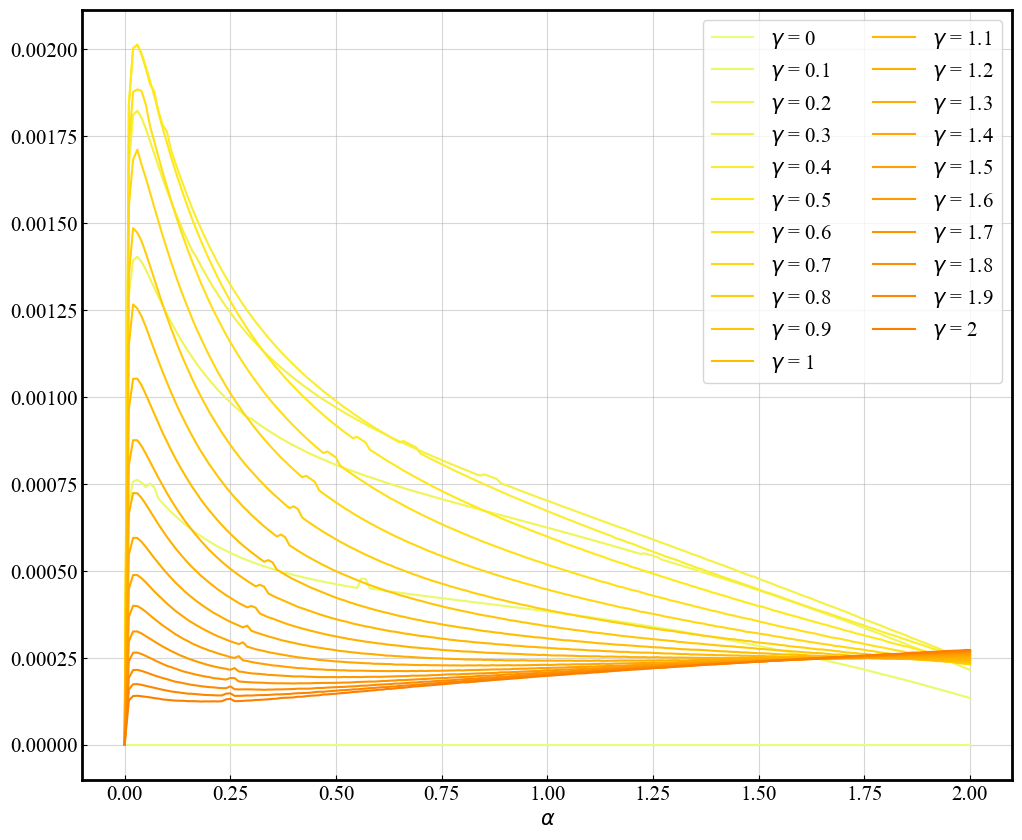

In [83]:
fig = plt.figure(figsize=(12,10))
mpl.rcParams['axes.linewidth'] = 2

plt.xlabel(r'$\gamma$')

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})

plt.xlabel(r'$\alpha$')

for i in range(len(gam_arr)): 
    if i % 2 != 0:
        plt.plot(alp_arr,globals()['bet{}_GAM{}'.format(62.5,i)],label = r"$\gamma$ = " + str(gam_arr[i]), color = c_spri[i])#, marker = '+',mfc = 'None',markersize=5)
    if i % 2 == 0:
        plt.plot(alp_arr,globals()['bet{}_GAM{}'.format(62.5,i)],label = r"$\gamma$ = " + str(gam_arr[i]), color = c_spri[i])#, marker = 'o', mfc = 'None',markersize = 5)

#plt.text(1.4,-0.01,"OCA, Size : 5",fontsize = 25)

#plt.title("Difference of orderparameter value between beta 50 and 62.55")
plt.grid(alpha=0.5)
plt.legend(ncol=2)
#plt.savefig("/Users/e2_602_qma/Documents/ACTIVATING/Plotimg/20241009_Orderparameter/Diff_Ns5_b_50_62_5.pdf",format='pdf',bbox_inches='tight')

In [84]:
g_dom = []
alp_dom = []

for asdf in range(len(plta)-1):
    for i in range(len(gam_arr)):
        for j in range(len(alp_arr)-2):
            if np.sign(globals()['bet{}_GAM{}'.format(plta[asdf+1],i)][j+1]) != np.sign(globals()['bet{}_GAM{}'.format(plta[asdf+1],i)][j+2]):
                g_dom.append(gam_arr[i])
                alp_dom.append(alp_arr[j])


    globals()['tdplt{}'.format(int(plta[asdf+1]))] = []

    for k in range(len(alp_dom)):
        b = [alp_dom[k],g_dom[k],plta[asdf+1]]
        globals()['tdplt{}'.format(int(plta[asdf+1]))].append(b)

    df = np.column_stack((alp_dom,g_dom))
    np.savetxt('./Difference/NCA/3Dplt_s5_lb{}.txt'.format(plta[asdf+1]),df)


In [54]:
tdplt12

[[0, 0.3, 12.5],
 [0, 0.4, 12.5],
 [0, 0.5, 12.5],
 [0, 0.6, 12.5],
 [0, 0.7, 12.5],
 [0, 0.8, 12.5],
 [0, 0.9, 12.5],
 [0.14, 0.1, 12.5],
 [0.16, 0.2, 12.5],
 [0.18, 0.3, 12.5],
 [0.2, 0.4, 12.5],
 [0.21, 0.5, 12.5],
 [0.2, 0.6, 12.5],
 [0.16, 0.7, 12.5],
 [0.1, 0.8, 12.5],
 [0.04, 0.9, 12.5],
 [0.01, 1, 12.5],
 [0, 1.1, 12.5],
 [0, 1.2, 12.5],
 [0.57, 0.1, 12.5],
 [0.6, 0.2, 12.5],
 [0.65, 0.3, 12.5],
 [0.68, 0.4, 12.5],
 [0.69, 0.5, 12.5],
 [0.66, 0.6, 12.5],
 [0.59, 0.7, 12.5],
 [0.49, 0.8, 12.5],
 [0.37, 0.9, 12.5],
 [0.24, 1, 12.5],
 [0.12, 1.1, 12.5],
 [0.04, 1.2, 12.5],
 [0.01, 1.3, 12.5],
 [0, 1.4, 12.5]]

In [ ]:
fig = plt.figure(figsize=(12,10))
mpl.rcParams['axes.linewidth'] = 2

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\gamma$')

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')



plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})

#plt.title(r"Orderparameter crossing point between $\beta$ = 50 and $\beta$ = 62.5")

plt.scatter(alp_dom,g_dom,marker = '*',s=300,color = c_rs[10] , facecolor='None' ,linewidths=2)
plt.plot(alp_dom,g_dom,linestyle = '--',color=c_rs[9])
plt.grid(alpha=0.5)
#plt.savefig("/Users/e2_602_qma/Documents/GitHub/Anaconda/Simdata/G_PP/data_For_compar/0_20241002_Con6_2DAT/Orderfig_Rev/sO_cross_b5_25.pdf",format='pdf',bbox_inches='tight')


In [47]:
for i in range(len(plta)-1):
    globals()['tdplt{}'.format(int(plta[asdf+1]))] = pd.read_csv("./Difference/NCA/3Dplt_s3_lb{}.txt".format(plta[i+1]),header=None,delim_whitespace=True)

In [89]:
tdplt62

[]

3D plot test

In [85]:

# 데이터 분리

#alpha0, gamma0, temperature0 = zip(*tdplt25)
#alpha1, gamma1, temperature1 = zip(*tdplt16)
#alpha2, gamma2, temperature2 = zip(*tdplt12)
#alpha3, gamma3, temperature3 = zip(*tdplt10)
#alpha4, gamma4, temperature4 = zip(*tdplt8)
#alpha5, gamma5, temperature5 = zip(*tdplt27)
#alpha6, gamma6, temperature6 = zip(*tdplt31)
#alpha7, gamma7, temperature7 = zip(*tdplt35)
alpha8, gamma8, temperature8 = zip(*tdplt41)
alpha9, gamma9, temperature9 = zip(*tdplt50)
alpha10, gamma10, temperature10 = zip(*tdplt62)


# 그래프 생성 (해상도 증가)
fig = plt.figure(figsize=(10, 10), dpi=100)  # 1000x1000 해상도
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기 (색상을 temperature에 따라 설정)
#scatter = ax.scatter(alpha1, gamma1, temperature1)
#scatter = ax.scatter(alpha2, gamma2, temperature2)
#scatter = ax.scatter(alpha3, gamma3, temperature3)
#scatter = ax.scatter(alpha4, gamma4, temperature4)
#scatter = ax.scatter(alpha0, gamma0, temperature0)
#scatter = ax.scatter(alpha5, gamma5, temperature5)
#scatter = ax.scatter(alpha6, gamma6, temperature6)
#scatter = ax.scatter(alpha7, gamma7, temperature7)
scatter = ax.scatter(alpha8, gamma8, temperature8)
scatter = ax.scatter(alpha9, gamma9, temperature9)
scatter = ax.scatter(alpha10, gamma10, temperature10)


#ax.plot(alpha1, gamma1, temperature1)
#ax.plot(alpha2, gamma2, temperature2)
#ax.plot(alpha3, gamma3, temperature3)
#ax.plot(alpha4, gamma4, temperature4)
#ax.plot(alpha0, gamma0, temperature0)
#ax.plot(alpha5, gamma5, temperature5)
#ax.plot(alpha6, gamma6, temperature6)
#ax.plot(alpha7, gamma7, temperature7)

# 축 레이블 설정
ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel(r'$\gamma$', fontsize=20)
ax.set_zlabel(r'$\beta$', fontsize=20)

# 제목 설정
ax.set_title('3D Plot of Gamma, Alpha, and Temperature', fontsize=14)
ax.view_init(elev=20, azim=70)

# 배경색 제거 및 그리드 설정
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(True)

ax.invert_xaxis()
ax.invert_yaxis()
ax.invert_zaxis()

# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
#plt.show()
#plt.savefig("/Users/e2_602_qma/Documents/ACTIVATING/Plotimg/20241009_Orderparameter/3dplot_lowtemp_Os3_ele20.pdf",format='pdf',bbox_inches='tight')

ValueError: not enough values to unpack (expected 3, got 0)

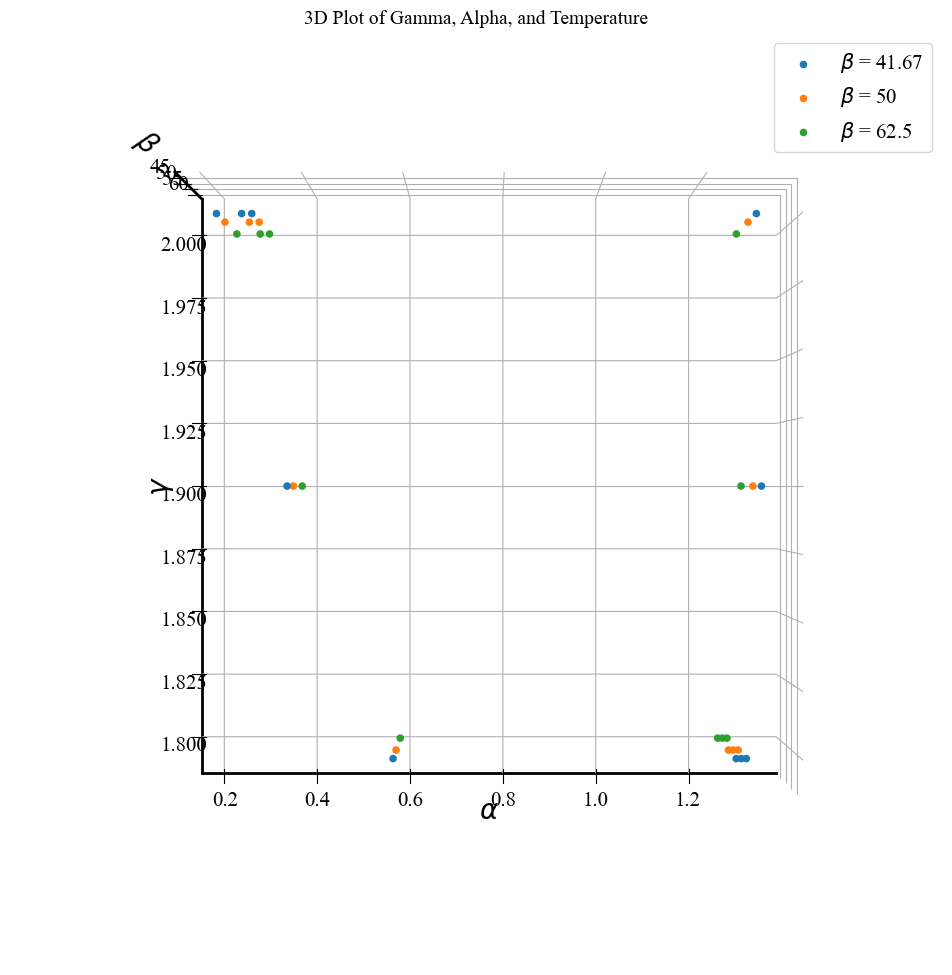

In [80]:
# 그래프 생성 (해상도 증가)
fig = plt.figure(figsize=(10, 10), dpi=100)  # 1000x1000 해상도
ax = fig.add_subplot(111, projection='3d')

#scatter = ax.scatter(alpha1, gamma1, temperature1,label=r"$\beta$ = 16")
#scatter = ax.scatter(alpha2, gamma2, temperature2,label=r"$\beta$ = 12")
#scatter = ax.scatter(alpha3, gamma3, temperature3,label=r"$\beta$ = 10")
#scatter = ax.scatter(alpha4, gamma4, temperature4,label=r"$\beta$ = 8")
#scatter = ax.scatter(alpha0, gamma0, temperature0,label=r"$\beta$ = 25")
#scatter = ax.scatter(alpha5, gamma5, temperature5,label=r"$\beta$ = 27")
#scatter = ax.scatter(alpha6, gamma6, temperature6,label=r"$\beta$ = 31")
#scatter = ax.scatter(alpha7, gamma7, temperature7,label=r"$\beta$ = 35")
scatter = ax.scatter(alpha8, gamma8, temperature8,label=r"$\beta$ = 41.67")
scatter = ax.scatter(alpha9, gamma9, temperature9,label=r"$\beta$ = 50")
scatter = ax.scatter(alpha10, gamma10, temperature10,label=r"$\beta$ = 62.5")
#ax.plot(alpha1, gamma1, temperature1)
#ax.plot(alpha2, gamma2, temperature2)
#ax.plot(alpha3, gamma3, temperature3)
#ax.plot(alpha4, gamma4, temperature4)
#ax.plot(alpha0, gamma0, temperature0)
#ax.plot(alpha5, gamma5, temperature5)
#ax.plot(alpha6, gamma6, temperature6)
#ax.plot(alpha7, gamma7, temperature7)

# 축 레이블 설정
ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel(r'$\gamma$', fontsize=20)
ax.set_zlabel(r'$\beta$', fontsize=20)

# 제목 설정
ax.set_title('3D Plot of Gamma, Alpha, and Temperature', fontsize=14)
ax.view_init(elev=90, azim=90)

# 배경색 제거 및 그리드 설정
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(True)

ax.invert_xaxis()
ax.invert_yaxis()
ax.invert_zaxis()


# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
ax.legend()
#plt.show()
#plt.savefig("/Users/e2_602_qma/Documents/ACTIVATING/Plotimg/20241009_Orderparameter/3dplot_lowtemp_Os3_ele90.pdf",format='pdf',bbox_inches='tight')


In [99]:
TOA_matrix_from_file('/Users/e2_602_qma/Documents/ACTIVATING/BEAR_DATA/0_20241011_TOACon6/b25/data/Gt_g0_a0.dat',3)

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])